## Instruções

Treine um classificador SVM com o dataset anexo. Este dataset contém as transações feitas por uma operadora de cartão de créditos. Existem 492 fraudes de um total de mais de 280 mil transações. 

O atributo 'Amount' é o valor da transação.  As colunas V1, V2, V3 ... representam as componentes principais do dataset original. O atributo a ser previsto está na coluna Class. O valor 1 representa uma transação fraudulenta e o valor 0, uma transação legítima.


In [1]:
# Para manipulação de dados
import pandas as pd
import numpy as np

# Para visualização de dados
import matplotlib.pyplot as plt

# Para avaliação dos modelos
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [2]:
np.set_printoptions(formatter={'float_kind': "{:.3f}".format})
pd.set_option('display.float_format', '{:.3f}'.format)

In [3]:
df = pd.read_feather('creditcard.feather')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Separação em treino e teste

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X, y = df.drop('Class', axis=1), df['Class']

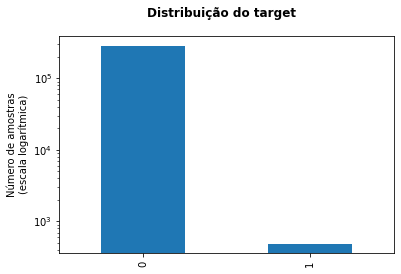

In [14]:
fig, ax = plt.subplots()
fig.suptitle('Distribuição do target', weight='bold')
ax.set_ylabel('Número de amostras\n(escala logarítmica)')
ax.set_yscale('log')
y.value_counts().plot(kind='bar', ax=ax)
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

## Treinando LinearSVC

In [10]:
from sklearn.svm import LinearSVC

In [17]:
linear_clf = LinearSVC(random_state=42, class_weight='balanced', max_iter=3000)

In [60]:
%time
linear_clf.fit(X_train, y_train)

Wall time: 0 ns


C:\Users\lucas\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(class_weight='balanced', max_iter=2000, random_state=42)

In [61]:
y_pred = linear_clf.predict(X_test)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



C:\Users\lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


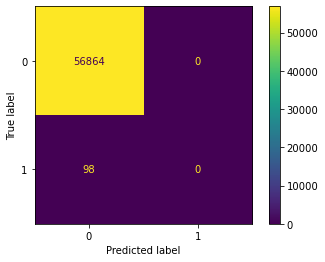

In [65]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

## Aplicando PCA 

Como pudemos ver, nosso modelo demora muito para treinar, logo poderíamos nos beneficiar do PCA para diminuir a quantidade de features do modelo e então treiná-lo mais rápidamente

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA()

In [46]:
pca.fit(X)

PCA()

In [47]:
pca_data = pca.transform(X) 

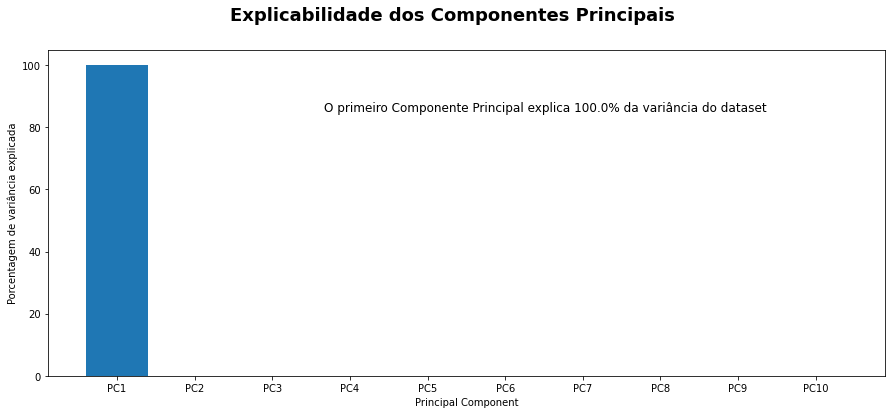

In [48]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)[:10]
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(15, 6)) 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Porcentagem de variância explicada')
plt.xlabel('Principal Component')
plt.suptitle('Explicabilidade dos Componentes Principais', size=18, weight='bold')
plt.annotate(
    text=f'O primeiro Componente Principal explica {per_var[:1].sum():.1f}% da variância do dataset',
    xy=(0.3,0.7), xycoords='figure fraction', size=12
)
plt.show()

In [49]:
pca_df = pd.DataFrame(pca_data[:, :10], columns=labels)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,94813.863,55.979,0.743,-0.341,0.608,-1.685,-0.201,0.447,-0.182,0.390
1,94813.855,-90.954,-1.429,0.434,0.578,0.868,0.351,-0.878,0.078,-0.250
2,94812.876,285.025,0.258,-0.572,-0.229,-0.987,1.211,0.103,-0.396,-1.161
3,94812.861,29.860,0.467,-0.503,-1.228,-0.779,1.032,0.159,-0.413,-1.284
4,94811.858,-23.652,0.871,0.529,-0.154,-1.030,-0.283,-0.117,0.122,1.079


In [50]:
X_pca = pca_df[['PC1']]

### Nova separação em treino e teste

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

## Treinando SVC

In [66]:
from sklearn.svm import SVC

In [67]:
svc_model = SVC(kernel='linear', random_state=42, class_weight='balanced')

In [ ]:
%time
svc_model.fit(X_train, y_train)

In [61]:
y_pred = svc_model.predict(X_test)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



C:\Users\lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


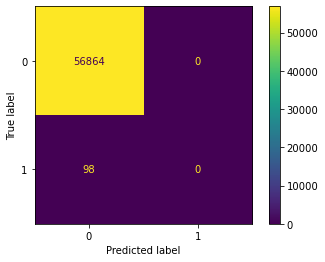

In [65]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

## Treinando Anomaly Detection

### Nova separação em treino e teste

Dessa vez vamos criar um dataset de validação!

In [141]:
X_train, X_test_full, y_train, y_test_full = train_test_split(
    X.values, y.values,
    test_size=0.4,
    random_state=42,
    shuffle=True,
    stratify=y
)

In [142]:
X_test, X_val, y_test, y_val = train_test_split(
    X_test_full, y_test_full,
    test_size=0.5,
    random_state=42,
    shuffle=True,
    stratify=y_test_full
)

In [148]:
def estimate_gaussian(X): 
    """
    Calculates mean and variance of all features 
    in the dataset
    
    Args:
        X (ndarray): (m, n) Data matrix
    
    Returns:
        mu (ndarray): (n,) Mean of all features
        var (ndarray): (n,) Variance of all features
    """

    #m, n = X.shape
    
    ### START CODE HERE ### 
    mu = np.mean(X, axis=0)
    var = np.var(X, axis=0)
    ### END CODE HERE ### 
        
    return mu, var

In [149]:
# # Estimate mean and variance of each feature
# mu, var = estimate_gaussian(X_train)              

# print("Mean of each feature:", mu)
# print("Variance of each feature:", var)

Mean of each feature: [94939.373 0.002 -0.004 -0.002 0.000 0.000 -0.001 -0.002 -0.000 0.003
 -0.000 -0.003 0.000 -0.003 -0.001 0.000 -0.002 0.000 -0.001 0.000 -0.001
 0.001 0.000 0.001 0.000 -0.001 0.000 -0.001 0.000 88.429]
Variance of each feature: [2256874497.913 3.838 2.728 2.308 2.002 1.909 1.775 1.554 1.420 1.205
 1.186 1.043 1.001 0.990 0.918 0.837 0.768 0.721 0.705 0.662 0.609 0.546
 0.528 0.393 0.366 0.273 0.233 0.166 0.099 65247.333]


In [150]:
def multivariate_gaussian(X, mu, var):
    """
    Computes the probability 
    density function of the examples X under the multivariate gaussian 
    distribution with parameters mu and var. If var is a matrix, it is
    treated as the covariance matrix. If var is a vector, it is treated
    as the var values of the variances in each dimension (a diagonal
    covariance matrix
    """
    
    k = len(mu)
    
    if var.ndim == 1:
        var = np.diag(var)
        
    X = X - mu
    p = (2* np.pi)**(-k/2) * np.linalg.det(var)**(-0.5) * \
        np.exp(-0.5 * np.sum(np.matmul(X, np.linalg.pinv(var)) * X, axis=1))
    
    return p

In [151]:
# # Returns the density of the multivariate normal
# # at each data point (row) of X_train
# p = multivariate_gaussian(X_train, mu, var)

In [156]:
def select_threshold(y_val, p_val): 
    """
    Finds the best threshold to use for selecting outliers 
    based on the results from a validation set (p_val) 
    and the ground truth (y_val)
    
    Args:
        y_val (ndarray): Ground truth on validation set
        p_val (ndarray): Results on validation set
        
    Returns:
        epsilon (float): Threshold chosen 
        F1 (float):      F1 score by choosing epsilon as threshold
    """ 

    best_epsilon = 0
    best_F1 = 0
    F1 = 0
    
    step_size = (max(p_val) - min(p_val)) / 1000
#     step_size = len(p_val)/10
    
    for epsilon in np.arange(min(p_val), max(p_val), step_size):
        
        predictions = np.where(p_val < epsilon, 1, 0)
    
        ### START CODE HERE ### 
        tp = ((y_val == 1) & (predictions == 1)).sum()
        fp = ((y_val == 0) & (predictions == 1)).sum()
        fn = ((y_val == 1) & (predictions == 0)).sum()
        
        prec = tp / (tp + fp)
        
        rec = tp / (tp + fn)
        
        F1 = 2*prec*rec / (prec + rec)
        
        ### END CODE HERE ### 
        
        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon
        
    return best_epsilon, best_F1

In [157]:
# p_val = multivariate_gaussian(X_val, [mu], var)
# epsilon, F1 = select_threshold(y_val, p_val)

# print('Best epsilon found using cross-validation: %e' % epsilon)
# print('Best F1 on Cross Validation Set: %f' % F1)

C:\Users\lucas\AppData\Local\Temp/ipykernel_26512/860306486.py:32: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp / (tp + fp)


Best epsilon found using cross-validation: 5.395355e-11
Best F1 on Cross Validation Set: 0.006925
